In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [36]:
df = pd.read_csv(r"C:\Python 2k25\test_datasets\archive (1)\Mall_Customers.csv").dropna()
print('Datset has been loaded! \n', df)

Datset has been loaded! 
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [37]:
df['Gender'] = df['Gender'].replace({'Male' : 0, 'Female': 1})
X = df.drop('CustomerID' , axis=1)

# print(X)
model = KMeans()
model.fit(X)
print("DONE! ")


DONE! 


C:\Users\pr\AppData\Local\Temp\ipykernel_5524\804355781.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male' : 0, 'Female': 1})


In [38]:



# Step 3: Standardize the features (very important for K-Means!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Choose number of clusters (here we use 3 as an example)
# You can change this or use the elbow method below to find optimal k
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

# Step 5: Get the cluster labels
labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['cluster'] = labels

# Print some results
print("\nCluster assignments (first 10 rows):")
print(df)

print("\nCluster sizes:")
print(df['cluster'].value_counts())


Cluster assignments (first 10 rows):
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       0   19                  15                      39   
1             2       0   21                  15                      81   
2             3       1   20                  16                       6   
3             4       1   23                  16                      77   
4             5       1   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196       1   35                 120                      79   
196         197       1   45                 126                      28   
197         198       0   32                 126                      74   
198         199       0   32                 137                      18   
199         200       0   30                 137                      83   

     cluster  
0          2  
1          2  
2   

In [40]:
# Group by cluster and compute mean for each feature
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

# Optional: Also include count of customers in each cluster
cluster_summary_with_count = df.groupby('cluster').agg({
    'CustomerID': 'count',
    'Gender': lambda x: (x == 1).mean(),  # Proportion of males (if 1 = male)
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).rename(columns={'CustomerID': 'Count', 'Gender': 'Proportion Male'})
print("\nCluster Summary with Counts:")
print(cluster_summary_with_count.round(2))

         CustomerID    Gender        Age  Annual Income (k$)  \
cluster                                                        
0         67.676056  0.605634  52.169014           46.676056   
1        167.171429  0.371429  40.228571           91.342857   
2        100.468085  0.595745  28.276596           59.585106   

         Spending Score (1-100)  
cluster                          
0                     39.295775  
1                     20.628571  
2                     69.446809  

Cluster Summary with Counts:
         Count  Proportion Male    Age  Annual Income (k$)  \
cluster                                                      
0           71             0.61  52.17               46.68   
1           35             0.37  40.23               91.34   
2           94             0.60  28.28               59.59   

         Spending Score (1-100)  
cluster                          
0                         39.30  
1                         20.63  
2                         69.45 


Cluster centers (in original feature scale):
   CustomerID     Gender        Age  Annual Income (k$)
0    0.605634  52.169014  46.676056           39.295775
1    0.371429  40.228571  91.342857           20.628571
2    0.595745  28.276596  59.585106           69.446809


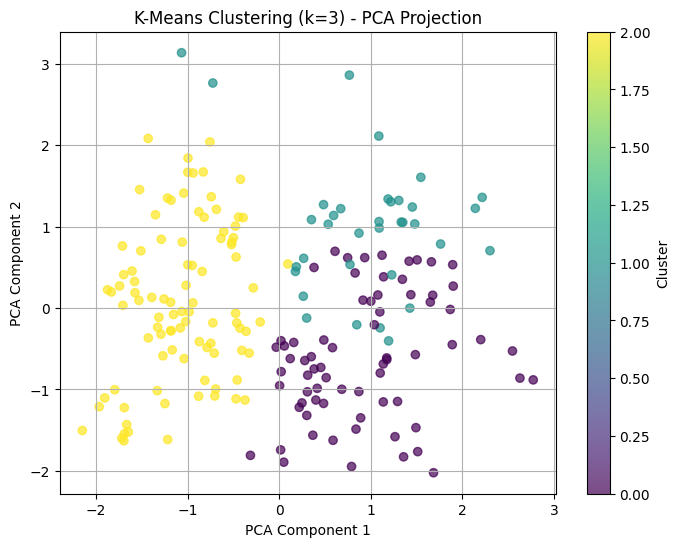

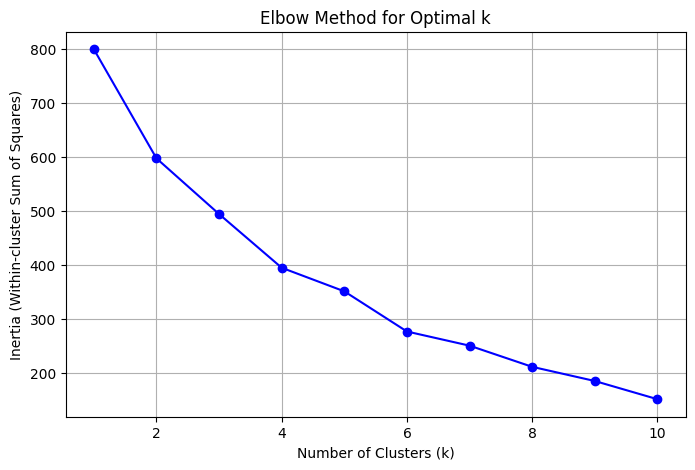

In [41]:
# Optional: View cluster centers (in original scale)
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)
print("\nCluster centers (in original feature scale):")
print(pd.DataFrame(centers_original, columns=df.columns[:-2]))  # Exclude 'cluster' column

# Step 6: Visualization (reduce to 2D using PCA since we have 5 features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title(f'K-Means Clustering (k={n_clusters}) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# Optional: Elbow method to find optimal number of clusters
inertias = []
K_range = range(1, 11)  # Test k from 1 to 10

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()